In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt


# Gerekli kütüphaneleri import ediyouz.

Çalışmada kullanılacak veri setini yükleme ve basit adımlarla kullanıma hazırlama aşaması

In [25]:
data=pd.read_csv('train.csv') # Veri setini okuyoruz.
data.head() # Veri setinin ilk 5 satırını gösteriyoruz.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.describe() # Veri setinin istatistiksel özelliklerini gösteriyoruz.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
data.isnull().sum() # Veri setindeki eksik verilerin sütun başına toplamını gösteriyoruz.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data["Age"].fillna(data["Age"].mean(),inplace=True) # Age sütunundaki eksik verileri ortalama değer ile dolduruyoruz.

In [29]:
data.isnull().sum() # Veri setindeki eksik verileri gösteriyoruz.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
FeatureData=data.drop(['PassengerId','Name','Ticket','Cabin','Survived','Embarked'],axis=1) # İlk bakışta sınıflandırma için çok kullanışlı gözükmeyen sütunları çıkardık.
FeatureData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [31]:
label_encoder = LabelEncoder() # Sex satırı karakter olduğu için sayısal değere çeviriyoruz.
FeatureData['Sex'] = label_encoder.fit_transform(FeatureData['Sex']) 
FeatureData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [32]:
LabelData=data['Survived']
LabelData.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Gradient boosting algoritmasının uygulanması 

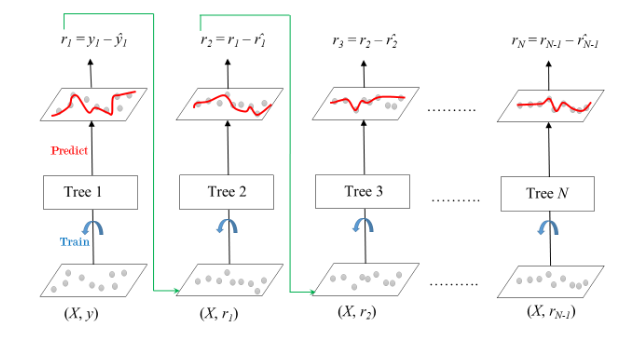

Yukarıdaki görsel Gradient boosting algoritması içerisinde karar ağaçlarının çalışma prensibini basitçe açıklıyor, Gradient boosting algoritması içerisinde çalıştırdığı karar ağaçlarının tahmin etme süreci sonrası yaptığı hataları bir sonraki ağaca bir nevi ileterek belirli bir adım sayısı sonrası alınan hatayı minimize ediyor. Görsel geeksforgeeks.org'dan alınmıştır. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(FeatureData, LabelData, test_size=0.2, random_state=1) # Veri setini eğitim ve test olarak ayırıyoruz.

Gradient Boosting Regressor algoritmasının uygulanması

In [34]:
gbr = GradientBoostingRegressor(loss='absolute_error',  learning_rate=0.1, n_estimators=300, max_depth = 1, random_state = 1,max_features = 5) # GradientBoostingRegressor algoritması ile modelimizi eğitiyoruz.

loss='absolute_error' = Bu parametre, algoritmanın minimize edilecek kayıp fonksiyonun karakterini belirliyor, bu örnekte kullanılan 'absolute_error' yöntemi, aşağıdaki formülden hareketle tahmin edilen ve gerçek değerler arası mutlak farkın toplamı, bölü setteki veri sayısı hesaplanarak bulunur.

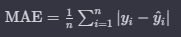

learning_rate = Bu parametre Algoritmanın kayıp fonksiyonunda minimum hataya ulaşmak için atıcağı adım sayısını kontrol ediyor.   

n_estimators = Bu parametre Algoritma içinde kullanılacak karar ağacı sayısını belirliyor.

max_depth = Bu parametre kullanılan karar ağaçlarının ne kadar derine ineceğini belirliyor. 

random_state = Bu parametre algoritmanın tekrar üretilebilirliğini sağlamak için rastgeleliği bir değere sabitliyor.

max_features = Bu parametre karar ağaçlarının yaprak ayrımlarında ayırma işlemi için ne kadar Feature değerini göz önüne alacağını belirliyor.

In [35]:
gbr.fit(X_train, y_train) 

GradientBoostingRegressor(loss='absolute_error', max_depth=1, max_features=5,
                          n_estimators=300, random_state=1)

In [36]:
pred_y = gbr.predict(X_test) # Test verileri ile algoritmamıza tahmin yaptırıyoruz.
test_rmse = mean_squared_error(y_test, pred_y) ** (1 / 2) # Hata payının hesaplıyoruz.
print('Root mean Square error: {:.2f}'.format(test_rmse)) 


Root mean Square error: 0.45


Gradient Boosting Classifier algoritmasının uygulanması


In [37]:
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01,random_state=100,max_features=15 ) # Bu sefer sınıflandırma için GradientBoostingClassifier algoritmasını kullanıyoruz.

n_estimators = Bu parametre Algoritma içinde kullanılacak karar ağacı sayısını belirliyor.

learning_rate = Bu parametre Algoritmanın loss fonksiyonunda minimum hataya ulaşmak için atıcağı adım sayısını kontrol ediyor.   

max_depth = Bu parametre kullanılan karar ağaçlarının ne kadar derine ineceğini belirliyor. 

random_state = Bu parametre algoritmanın tekrar üretilebilirliğini sağlamak için rastgeleliği bir değere sabitliyor.

max_features = Bu parametre karar ağaçlarının yaprak ayrımlarında ayırma işlemi için ne kadar Feature değerini göz önüne alacağını belirliyor.

In [38]:
gbc.fit(X_train, y_train)
pred_y = gbc.predict(X_test)
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.79


XGBoost ve LightGBM algoritmalarının farkları ve uygulamaları 

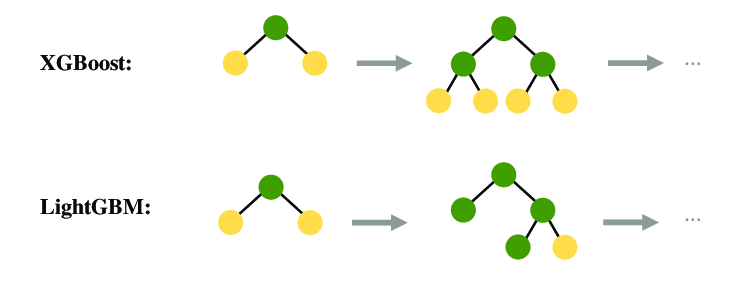

1. Ağaçları derinleştirme stratejisi

XGBoost: Ağaçları derinleştirmek için bir düzey büyüme (level-wise) stratejisi kullanır. Yani, bir seviyedeki tüm karar noktalarının üzerinden geçer ve ardından bir sonraki seviyeye geçer.

LightGBM: Yaprak odaklı (leaf-wise) bir ağaç büyüme stratejisi kullanır. Bu, belirli bir yoldaki yaprakları genişleterek, kayıp fonksiyonunu en çok azaltan yola odaklanır.

2. Katagorik feature işleme

XGBoost: One-Hot Encoding veya Label Encoding gibi kategorik özellikleri sayısal değerlere çevirerek işleme gerçekleştirebilir.

LightGBM: Kategorik değerleri histogramlar yardımıyla sayısal değerlere çevirmeden işleyebilir bu da algoritmaya büyük verilerle işlem yapma açısından hız kazandırır. 

3. Bellek kullanımı 

LigthGBM bellek kullanımı açısından daha verimlidir çünkü karar ağacını kurarken yapraklar konusunda seçici davranır. 

4. Performans ve Hız 

Genel olarak LigthGBM büyük veride daha hızlı, XGBoost ise yüksek performanslı fakat yavaş kalan bir algoritma


XGBoost algoritmasının uygulanması


[0]	train-logloss:0.64099	test-logloss:0.66601
[1]	train-logloss:0.60033	test-logloss:0.63284
[2]	train-logloss:0.57038	test-logloss:0.60707
[3]	train-logloss:0.55921	test-logloss:0.60079
[4]	train-logloss:0.53556	test-logloss:0.58087
[5]	train-logloss:0.52665	test-logloss:0.57476
[6]	train-logloss:0.50706	test-logloss:0.55675
[7]	train-logloss:0.49052	test-logloss:0.54494
[8]	train-logloss:0.47657	test-logloss:0.53239
[9]	train-logloss:0.46554	test-logloss:0.52433
[10]	train-logloss:0.45474	test-logloss:0.51547
[11]	train-logloss:0.45106	test-logloss:0.51377
[12]	train-logloss:0.44253	test-logloss:0.50991
[13]	train-logloss:0.43482	test-logloss:0.50337
[14]	train-logloss:0.42669	test-logloss:0.49744
[15]	train-logloss:0.42025	test-logloss:0.49185
[16]	train-logloss:0.41697	test-logloss:0.49221
[17]	train-logloss:0.41239	test-logloss:0.48918
[18]	train-logloss:0.40786	test-logloss:0.48778
[19]	train-logloss:0.40423	test-logloss:0.48469


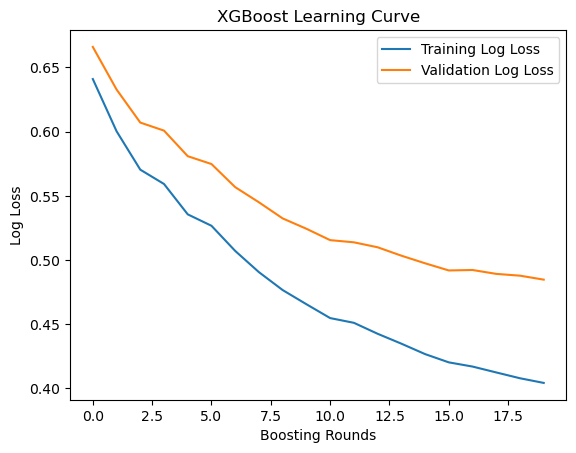

In [39]:
dtrain = xgb.DMatrix(X_train, label=y_train) # XGBoost algoritması için veri setini DMatrix formatına çeviriyoruz.
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic', # Sınıflandırma için binary:logistic parametresini kullanıyoruz.
    'eval_metric': 'logloss', # Logloss değerini kullanıyoruz.
    'max_depth': 3, # Ağaç derinliğini 3 olarak belirliyoruz.
    'learning_rate': 0.1, # Öğrenme oranını 0.1 olarak belirliyoruz.
    'subsample': 0.8, # Alt örneklem oranını 0.8 olarak belirliyoruz.
    'colsample_bytree': 0.8 # Özellik örneklem oranını 0.8 olarak belirliyoruz.
} # XGBoost algoritmasının parametrelerini belirliyoruz.

evals_result = {} # Eğitim ve test verilerinin logloss değerlerini tutmak için bir sözlük oluşturuyoruz.

num_rounds = 20 # Boosting round sayısını belirliyoruz.
model = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dtest, 'test')],
                  evals_result=evals_result, early_stopping_rounds=20)  # XGBoost algoritmasını eğitiyoruz.


train_error = evals_result['train']['logloss']
val_error = evals_result['test']['logloss']

plt.plot(train_error, label='Training Log Loss')
plt.plot(val_error, label='Validation Log Loss') 
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

In [40]:
dtest = xgb.DMatrix(X_test, label=y_test) # Test verilerini DMatrix formatına çeviriyoruz.

y_pred = model.predict(dtest) # Test verileri ile algoritmamıza tahmin yaptırıyoruz.

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred] # Tahmin sonuçlarını 0.5 değerine göre 0 ve 1 olarak ayırıyoruz.

accuracy = accuracy_score(y_test, y_pred_binary) # Doğruluk oranını hesaplıyoruz.
print(f"Accuracy on the test set: {accuracy * 100:.2f}%") 

Accuracy on the test set: 78.21%


LightGBM algoritmasının uygulanması

In [48]:

train_data = lgb.Dataset(X_train, label=y_train)  
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary', 
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 100 
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])  

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


[LightGBM] [Info] Number of positive: 269, number of negative: 443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377809 -> initscore=-0.498858
[LightGBM] [Info] Start training from score -0.498858
Accuracy: 0.78
Confusion Matrix:
[[100   6]
 [ 33  40]]


<div style="text-align:center;">
  <p><strong>Yazar:</strong> <a href="https://www.linkedin.com/in/hakan-%C5%9Fenyurt-308896283/" target="_blank">Hakan Şenyurt</a></p>
  <img src="https://static.wixstatic.com/media/3ef854_11e098a45f1c4895a579489e193fd160~mv2.png/v1/fill/w_771,h_771,al_c,q_90,usm_0.66_1.00_0.01,enc_auto/3ef854_11e098a45f1c4895a579489e193fd160~mv2.png" alt="ITU VBK Logo">
  <a href="https://www.ituvbk.com/" target="_blank">İTÜ VBK</a>
</div>